

<font color='red' size='5'> Exercise 1: Implement Decision Tree Classifier (car Dataset)</font>
1. Importing Required Libraries Let's first load the required libraries.
2. Loading Data: Let's first load the required dataset using pandas read CSV function.
3. Feature Selection: Here, you need to divide given columns into two types of variables
dependent (or target variable) and independent variable (or feature variables).
4. Splitting Data: To understand model performance, dividing the dataset into a training set
and a test set is a good strategy.
• Let's split the dataset by using function train_test_split(). You need to pass 3
parameters features, target, and test_set size.
5. Building Decision Tree Model: Let's create a Decision Tree Model using Scikit-learn.
6. Evaluating Model: Let's estimate, how accurately the classifier or model can predict the
different classes.
7. Accuracy can be computed by comparing actual test set values and predicted values.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("car.csv")
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
df.tail(10)

,buying,maint,doors,persons,lug_boot,safety,class_values
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
def buying_maint(value):
    if value=='vhigh':
        return 4
    elif value=='high':
        return 3
    elif value=='med':
        return 2
    else:
        return 1

In [6]:
df['buying'] = df['buying'].apply(buying_maint)
df['maint'] = df['maint'].apply(buying_maint)

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [8]:
def door(value):
    if value == '5more':
        return 5
    elif value=='more':
        return 5
    else:
        return value  

In [9]:
df['doors'] = df['doors'].apply(door) 
df['persons'] = df['persons'].apply(door)

In [10]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,med,med,good
1724,1,1,5,5,med,high,vgood
1725,1,1,5,5,big,low,unacc
1726,1,1,5,5,big,med,good
1727,1,1,5,5,big,high,vgood


In [11]:
def lug_safety(value):
    if value=='low':
        return 1
    elif value=='med':
        return 2
    elif value =='high':
        return 3

In [12]:
df['safety'] = df['safety'].apply(lug_safety)

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,1,unacc
1,4,4,2,2,small,2,unacc
2,4,4,2,2,small,3,unacc
3,4,4,2,2,med,1,unacc
4,4,4,2,2,med,2,unacc


In [14]:
def lug_boots(value):
    if value=='small':
        return 1
    elif value=='med':
        return 2
    elif value =='big':
        return 3

In [15]:
df['lug_boot'] = df['lug_boot'].apply(lug_boots)

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [17]:
def resultant(value):
    if value =='unacc':
        return 0
    elif value == 'acc':
        return 1
    elif value=='good':
        return 2
    elif value =='vgood':
        return 3

In [18]:
df['class_values'] = df['class_values'].apply(resultant)

In [19]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2
1727,1,1,5,5,3,3,3


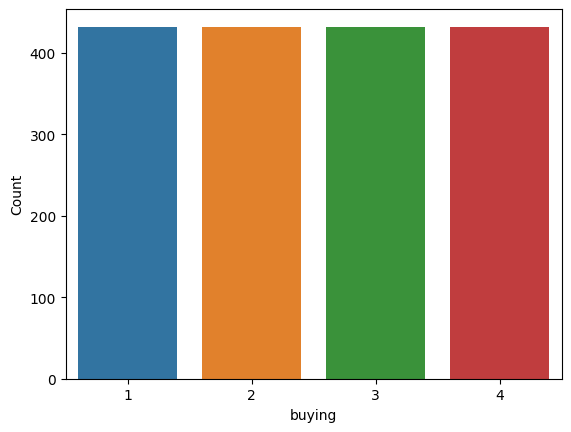

buying
4    432
3    432
2    432
1    432
Name: count, dtype: int64

In [20]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="buying", data=df)
plt.xlabel("buying")
plt.ylabel("Count")
plt.show()
df.loc[:,'buying'].value_counts()

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X = df.drop('class_values',axis=1)
Y= df['class_values']

In [23]:
X

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,5,2,2
1724,1,1,5,5,2,3
1725,1,1,5,5,3,1
1726,1,1,5,5,3,2


In [24]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class_values, Length: 1728, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [26]:
len(X_train)

1209

In [27]:
len(X_test)

519

In [28]:
X_train

,buying,maint,doors,persons,lug_boot,safety
772,3,1,2,4,3,2
1209,2,1,2,5,2,1
1487,1,3,5,2,1,3
494,3,4,4,2,3,3
1104,2,2,2,5,3,1
...,...,...,...,...,...,...
1648,1,1,3,2,1,2
601,3,3,4,2,3,2
1113,2,2,3,2,3,1
939,2,4,4,5,2,1


In [29]:
X_test

,buying,maint,doors,persons,lug_boot,safety
486,3,4,4,2,1,1
1001,2,3,3,2,1,3
1438,1,3,3,2,3,2
1570,1,2,4,2,2,2
1014,2,3,3,4,3,1
...,...,...,...,...,...,...
933,2,4,4,4,3,1
25,4,4,2,5,3,2
404,4,1,4,5,3,3
949,2,4,5,2,2,2


In [30]:
y_train

772     1
1209    0
1487    0
494     0
1104    0
       ..
1648    0
601     0
1113    0
939     0
588     0
Name: class_values, Length: 1209, dtype: int64

In [31]:
y_test

486     0
1001    0
1438    0
1570    0
1014    0
       ..
933     0
25      0
404     1
949     0
650     0
Name: class_values, Length: 519, dtype: int64

In [39]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [40]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [41]:
X_test

,buying,maint,doors,persons,lug_boot,safety
486,3,4,4,2,1,1
1001,2,3,3,2,1,3
1438,1,3,3,2,3,2
1570,1,2,4,2,2,2
1014,2,3,3,4,3,1
...,...,...,...,...,...,...
933,2,4,4,4,3,1
25,4,4,2,5,3,2
404,4,1,4,5,3,3
949,2,4,5,2,2,2


In [42]:
y=model.predict(X_test)
y

array([0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [43]:
model.score(X_train, y_train)

1.0

In [44]:
model.score(X_test, y_test)

0.9749518304431599